### ------------------------------------------------------------------------
### Projeto 2 Inteligência Artificial
### Projeto Final - Aprendizado de Máquina
### Algoritmos:  Árvore de Decisão, KNN, Redes Neurais e K-Means.
### -------------------------------------------------------------------------

### Adult Census Income Dataset
* https://www.kaggle.com/datasets/uciml/adult-census-income/data

*  Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

   * A single cell estimate of the population 16+ for each state.

   * Controls for Hispanic Origin by age and sex.

   * Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

## 1) Resumo geral da base de dados

### Carregamento da base dados pelo Drive

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dados Originais.

In [128]:
path = '/content/drive/MyDrive/Engenharia de Computação 7° Semestre/Inteligencia Artificial/Projeto2IA/'
df=pd.read_csv(path+'/adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [130]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [131]:
df.shape

(32561, 15)

In [132]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Não possui dados Nan

## 2) Pré-processamento

In [133]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

# **Transformação de dados Categoricos (object)**

### Encoding Categorical Features


* Atributos com apenas dois valores
* Classe LabelEncoder

In [134]:
from sklearn.preprocessing import LabelEncoder

In [135]:
df["education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [136]:
df['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [137]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [138]:
df[['age']].apply(np.mean)

age    38.581647
dtype: float64

In [139]:
df["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [140]:
df["marital.status"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [141]:
df["relationship"].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [142]:
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [143]:
df["native.country"].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [144]:
df["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [145]:
df["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [146]:
labelencoder = LabelEncoder()
df["sex"] = labelencoder.fit_transform(df["sex"])
df["income"] = labelencoder.fit_transform(df["income"])

* Atributos com mais de dois valores
* Função get_dummies()

In [147]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,0,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,0,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,1,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  int64 
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 3.7+ MB


In [149]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country'])

Dados ápos a trasformação de dados categoricos.

In [150]:
df

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,0,4356,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,0,4356,18,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,0,4356,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,0,3900,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,0,3900,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,58,151910,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 108 entries, age to native.country_Yugoslavia
dtypes: int64(8), uint8(100)
memory usage: 5.1 MB


In [152]:
df.columns

Index(['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'workclass_?', 'workclass_Federal-gov',
       ...
       'native.country_Portugal', 'native.country_Puerto-Rico',
       'native.country_Scotland', 'native.country_South',
       'native.country_Taiwan', 'native.country_Thailand',
       'native.country_Trinadad&Tobago', 'native.country_United-States',
       'native.country_Vietnam', 'native.country_Yugoslavia'],
      dtype='object', length=108)

### Normalização dos dados

In [153]:
std=StandardScaler()
colunas_a_manter = ['sex', 'income']
colunas_para_normalizar = df.columns.difference(colunas_a_manter)

df[colunas_para_normalizar] = std.fit_transform(df[colunas_para_normalizar])
df = pd.concat([df[colunas_a_manter], df[colunas_para_normalizar]], axis=1)


Dados ápos o pré processamento esta completo (normalização completa).

In [154]:
df

,sex,income,age,capital.gain,capital.loss,education.num,education_10th,education_11th,education_12th,education_1st-4th,...,relationship_Wife,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,0,3.769612,-0.14592,10.593507,-0.420060,-0.171753,-0.193487,-0.116092,-0.072016,...,-0.224927,4.090813,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,-0.290936,-0.203761,-0.02074
1,0,0,3.183112,-0.14592,10.593507,-0.420060,-0.171753,-0.193487,-0.116092,-0.072016,...,-0.224927,-0.244450,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074
2,0,0,2.010110,-0.14592,10.593507,-0.031360,-0.171753,-0.193487,-0.116092,-0.072016,...,-0.224927,4.090813,-0.174295,-0.262097,-0.014664,-1.516792,-0.188389,-0.290936,-0.203761,-0.02074
3,0,0,1.130359,-0.14592,9.461864,-2.363558,-0.171753,-0.193487,-0.116092,-0.072016,...,-0.224927,-0.244450,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074
4,0,0,0.177296,-0.14592,9.461864,-0.031360,-0.171753,-0.193487,-0.116092,-0.072016,...,-0.224927,-0.244450,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,0,-1.215643,-0.14592,-0.216660,-0.031360,-0.171753,-0.193487,-0.116092,-0.072016,...,-0.224927,-0.244450,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074
32557,0,0,-0.849080,-0.14592,-0.216660,0.746039,-0.171753,-0.193487,-0.116092,-0.072016,...,4.445891,-0.244450,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074
32558,1,1,0.103983,-0.14592,-0.216660,-0.420060,-0.171753,-0.193487,-0.116092,-0.072016,...,-0.224927,-0.244450,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074
32559,0,0,1.423610,-0.14592,-0.216660,-0.420060,-0.171753,-0.193487,-0.116092,-0.072016,...,-0.224927,-0.244450,-0.174295,-0.262097,-0.014664,0.659286,-0.188389,-0.290936,-0.203761,-0.02074


## 3) Algoritmos de Classificação
* Árvore de Decisão
* KNN
* Rede Neural

### Separação entre treino e teste (70% e 30%)

In [155]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [156]:
XA=df.drop(['income'], axis=1)
XB=df.drop(['income'], axis=1)
XC=df.drop(['income'], axis=1)
XD=df.drop(['income'], axis=1)


X = df.drop(['income'], axis=1).values
y = df['income'].values

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Decision Tree

Training Score 1.0
Testing Score 
 0.8136963865288156
[[6460  958]
 [ 862 1489]]


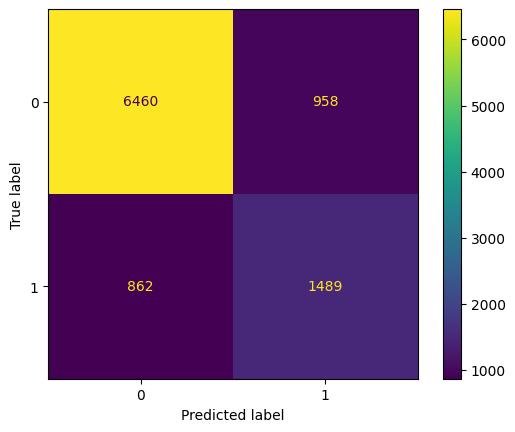

In [158]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

DT_score = DT.score(X_train, y_train)
DT_test = DT.score(X_test, y_test)

cm = confusion_matrix(y_test,y_pred)
print('Training Score',DT_score)
print('Testing Score \n',DT_test)
print(cm)
ConfusionMatrixDisplay(cm).plot()

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### KNN Classifier

Training Score 0.8738153738153738
Testing Score 
 0.8200429931415703
[[6669  741]
 [1017 1342]]


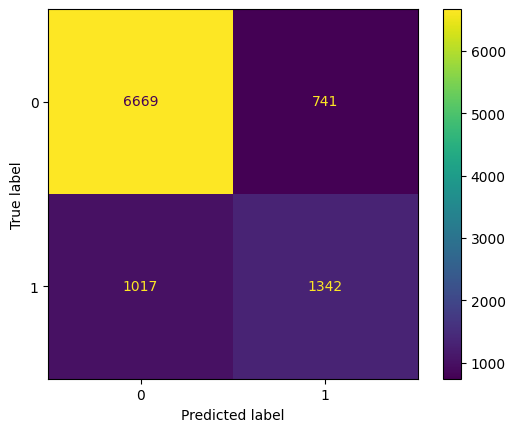

In [160]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test, y_test)

cm = confusion_matrix(y_test,y_pred)
print('Training Score',train_score)
print('Testing Score \n',test_score)
print(cm)
ConfusionMatrixDisplay(cm).plot()

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Rede Neural

Iteration 1, loss = 0.78674623
Iteration 2, loss = 0.55520803
Iteration 3, loss = 0.48688234
Iteration 4, loss = 0.44515930
Iteration 5, loss = 0.41759991
Iteration 6, loss = 0.39964069
Iteration 7, loss = 0.38776209
Iteration 8, loss = 0.37954433
Iteration 9, loss = 0.37349530
Iteration 10, loss = 0.36867769
Iteration 11, loss = 0.36475168
Iteration 12, loss = 0.36141644
Iteration 13, loss = 0.35852557
Iteration 14, loss = 0.35602130
Iteration 15, loss = 0.35379931
Iteration 16, loss = 0.35185151
Iteration 17, loss = 0.35009027
Iteration 18, loss = 0.34842722
Iteration 19, loss = 0.34691163
Iteration 20, loss = 0.34547901
Iteration 21, loss = 0.34406185
Iteration 22, loss = 0.34280464
Iteration 23, loss = 0.34153210
Iteration 24, loss = 0.34037607
Iteration 25, loss = 0.33920304
Iteration 26, loss = 0.33811458
Iteration 27, loss = 0.33713292
Iteration 28, loss = 0.33623163
Iteration 29, loss = 0.33533817
Iteration 30, loss = 0.33444431
Iteration 31, loss = 0.33365605
Iteration 32, los

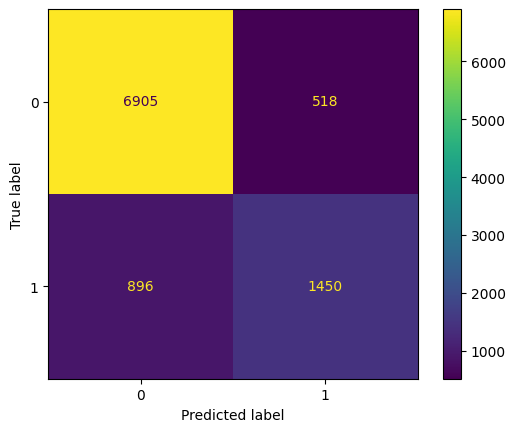

In [162]:
rna = MLPClassifier(hidden_layer_sizes=(10,5), activation='relu', solver='sgd', max_iter =200,
                              tol=0.0001, random_state = 3, verbose = True)
rna.fit(X_train, y_train)
y_pred = rna.predict(X_test)

train_score = rna.score(X_train,y_train)
test_score = rna.score(X_test, y_test)

cm = confusion_matrix(y_test,y_pred)
print('Training Score',train_score)
print('Testing Score \n',test_score)
print(cm)
ConfusionMatrixDisplay(cm).plot()

## 4) Balanceamento das classes
* Abordagem SMOTE

In [163]:
from imblearn.over_sampling import SMOTE

In [164]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


#### Decision Tree - Balanceamento e Validação Cruzada

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [166]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    sm = SMOTE()
    x_train_oversampled, y_train_oversampled = sm.fit_resample(x_train_fold, y_train_fold)
    DT.fit(x_train_oversampled, y_train_oversampled)
    lst_accu_stratified.append(DT.score(x_test_fold, y_test_fold))

df_balanced = pd.DataFrame(x_train_oversampled, columns=XA.columns)
df_balanced['income'] = y_train_oversampled

print("\nContagem de cada classe após o balanceamento:")
print(df_balanced['income'].value_counts())


# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))


Contagem de cada classe após o balanceamento:
0    22248
1    22248
Name: income, dtype: int64
Lista de ACC: [0.8044212465459011, 0.8015970515970516, 0.8003685503685504, 0.8068181818181818, 0.8022113022113022, 0.8148034398034398, 0.8114250614250614, 0.8071253071253072, 0.8046683046683046, 0.792997542997543]

Maior ACC: 81.48034398034399 %

Menor ACC: 79.2997542997543 %

Média ACC: 80.46435988560643 %

Desvio Padrão: 0.006048438865345


#### KNN - Balanceamento e Validação Cruzada

In [167]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    sm = SMOTE()
    x1_train_oversampled, y1_train_oversampled = sm.fit_resample(x_train_fold, y_train_fold)
    knn.fit(x1_train_oversampled, y1_train_oversampled)
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))

df_balanced = pd.DataFrame(x1_train_oversampled, columns=XB.columns)
df_balanced['income'] = y1_train_oversampled

print("\nContagem de cada classe após o balanceamento:")
print(df_balanced['income'].value_counts())

# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))


Contagem de cada classe após o balanceamento:
0    22248
1    22248
Name: income, dtype: int64
Lista de ACC: [0.775253300583359, 0.7813267813267813, 0.7764127764127764, 0.7788697788697788, 0.7767199017199017, 0.7788697788697788, 0.7807125307125307, 0.7641277641277642, 0.7813267813267813, 0.7807125307125307]

Maior ACC: 78.13267813267814 %

Menor ACC: 76.41277641277642 %

Média ACC: 77.74331924661982 %

Desvio Padrão: 0.005156356730494489


#### Redes Neurais - Balanceamento e Validação Cruzada

In [168]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    sm = SMOTE()
    x2_train_oversampled, y2_train_oversampled = sm.fit_resample(x_train_fold, y_train_fold)
    rna.fit(x2_train_oversampled, y2_train_oversampled)
    lst_accu_stratified.append(rna.score(x_test_fold, y_test_fold))

df_balanced = pd.DataFrame(x2_train_oversampled, columns=XB.columns)
df_balanced['income'] = y2_train_oversampled

print("\nContagem de cada classe após o balanceamento:")
print(df_balanced['income'].value_counts())

# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Iteration 1, loss = 0.72241743
Iteration 2, loss = 0.57532156
Iteration 3, loss = 0.49498582
Iteration 4, loss = 0.45348181
Iteration 5, loss = 0.43159217
Iteration 6, loss = 0.41860624
Iteration 7, loss = 0.41026105
Iteration 8, loss = 0.40436044
Iteration 9, loss = 0.39983684
Iteration 10, loss = 0.39612098
Iteration 11, loss = 0.39293644
Iteration 12, loss = 0.39018450
Iteration 13, loss = 0.38774194
Iteration 14, loss = 0.38554941
Iteration 15, loss = 0.38361685
Iteration 16, loss = 0.38183882
Iteration 17, loss = 0.38021877
Iteration 18, loss = 0.37865540
Iteration 19, loss = 0.37723450
Iteration 20, loss = 0.37588917
Iteration 21, loss = 0.37458680
Iteration 22, loss = 0.37343377
Iteration 23, loss = 0.37228615
Iteration 24, loss = 0.37126509
Iteration 25, loss = 0.37028022
Iteration 26, loss = 0.36932544
Iteration 27, loss = 0.36846524
Iteration 28, loss = 0.36762895
Iteration 29, loss = 0.36682437
Iteration 30, loss = 0.36607911
Iteration 31, loss = 0.36530657
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.72233494
Iteration 2, loss = 0.57493450
Iteration 3, loss = 0.49244827
Iteration 4, loss = 0.44996446
Iteration 5, loss = 0.42795111
Iteration 6, loss = 0.41508876
Iteration 7, loss = 0.40665680
Iteration 8, loss = 0.40061508
Iteration 9, loss = 0.39595818
Iteration 10, loss = 0.39213092
Iteration 11, loss = 0.38885275
Iteration 12, loss = 0.38605278
Iteration 13, loss = 0.38351587
Iteration 14, loss = 0.38129047
Iteration 15, loss = 0.37921503
Iteration 16, loss = 0.37736563
Iteration 17, loss = 0.37566563
Iteration 18, loss = 0.37409691
Iteration 19, loss = 0.37266700
Iteration 20, loss = 0.37129354
Iteration 21, loss = 0.37003382
Iteration 22, loss = 0.36882701
Iteration 23, loss = 0.36767666
Iteration 24, loss = 0.36662999
Iteration 25, loss = 0.36560062
Iteration 26, loss = 0.36463576
Iteration 27, loss = 0.36370623
Iteration 28, loss = 0.36289337
Iteration 29, loss = 0.36202850
Iteration 30, loss = 0.36128162
Iteration 31, loss = 0.36056109
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.72377901
Iteration 2, loss = 0.57614339
Iteration 3, loss = 0.49472096
Iteration 4, loss = 0.45319056
Iteration 5, loss = 0.43134478
Iteration 6, loss = 0.41838335
Iteration 7, loss = 0.40977617
Iteration 8, loss = 0.40361121
Iteration 9, loss = 0.39895017
Iteration 10, loss = 0.39514542
Iteration 11, loss = 0.39193776
Iteration 12, loss = 0.38925407
Iteration 13, loss = 0.38681164
Iteration 14, loss = 0.38460235
Iteration 15, loss = 0.38256772
Iteration 16, loss = 0.38075918
Iteration 17, loss = 0.37907958
Iteration 18, loss = 0.37757959
Iteration 19, loss = 0.37621512
Iteration 20, loss = 0.37485658
Iteration 21, loss = 0.37350088
Iteration 22, loss = 0.37228010
Iteration 23, loss = 0.37115232
Iteration 24, loss = 0.37007833
Iteration 25, loss = 0.36903556
Iteration 26, loss = 0.36803985
Iteration 27, loss = 0.36710545
Iteration 28, loss = 0.36618738
Iteration 29, loss = 0.36537790
Iteration 30, loss = 0.36459230
Iteration 31, loss = 0.36379166
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.72314758
Iteration 2, loss = 0.57610897
Iteration 3, loss = 0.49343582
Iteration 4, loss = 0.44988746
Iteration 5, loss = 0.42696363
Iteration 6, loss = 0.41385192
Iteration 7, loss = 0.40559526
Iteration 8, loss = 0.39982870
Iteration 9, loss = 0.39538706
Iteration 10, loss = 0.39169761
Iteration 11, loss = 0.38852708
Iteration 12, loss = 0.38579173
Iteration 13, loss = 0.38343919
Iteration 14, loss = 0.38131905
Iteration 15, loss = 0.37943786
Iteration 16, loss = 0.37762035
Iteration 17, loss = 0.37593400
Iteration 18, loss = 0.37433459
Iteration 19, loss = 0.37281106
Iteration 20, loss = 0.37139413
Iteration 21, loss = 0.37009151
Iteration 22, loss = 0.36884080
Iteration 23, loss = 0.36768496
Iteration 24, loss = 0.36656380
Iteration 25, loss = 0.36546610
Iteration 26, loss = 0.36447833
Iteration 27, loss = 0.36351788
Iteration 28, loss = 0.36259749
Iteration 29, loss = 0.36168445
Iteration 30, loss = 0.36083575
Iteration 31, loss = 0.36007658
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.72151910
Iteration 2, loss = 0.57320184
Iteration 3, loss = 0.49203433
Iteration 4, loss = 0.45030377
Iteration 5, loss = 0.42867035
Iteration 6, loss = 0.41601856
Iteration 7, loss = 0.40770505
Iteration 8, loss = 0.40173918
Iteration 9, loss = 0.39704157
Iteration 10, loss = 0.39320338
Iteration 11, loss = 0.39001736
Iteration 12, loss = 0.38725252
Iteration 13, loss = 0.38487125
Iteration 14, loss = 0.38274543
Iteration 15, loss = 0.38075216
Iteration 16, loss = 0.37896300
Iteration 17, loss = 0.37733838
Iteration 18, loss = 0.37581389
Iteration 19, loss = 0.37439748
Iteration 20, loss = 0.37310983
Iteration 21, loss = 0.37186778
Iteration 22, loss = 0.37068243
Iteration 23, loss = 0.36954439
Iteration 24, loss = 0.36851126
Iteration 25, loss = 0.36747201
Iteration 26, loss = 0.36656153
Iteration 27, loss = 0.36562731
Iteration 28, loss = 0.36477259
Iteration 29, loss = 0.36396676
Iteration 30, loss = 0.36317721
Iteration 31, loss = 0.36241216
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.72236418
Iteration 2, loss = 0.57551613
Iteration 3, loss = 0.49411740
Iteration 4, loss = 0.45207908
Iteration 5, loss = 0.43032622
Iteration 6, loss = 0.41759150
Iteration 7, loss = 0.40908359
Iteration 8, loss = 0.40307215
Iteration 9, loss = 0.39843118
Iteration 10, loss = 0.39469653
Iteration 11, loss = 0.39153705
Iteration 12, loss = 0.38880984
Iteration 13, loss = 0.38632863
Iteration 14, loss = 0.38408723
Iteration 15, loss = 0.38199860
Iteration 16, loss = 0.38003871
Iteration 17, loss = 0.37827014
Iteration 18, loss = 0.37660468
Iteration 19, loss = 0.37507165
Iteration 20, loss = 0.37359194
Iteration 21, loss = 0.37221501
Iteration 22, loss = 0.37087873
Iteration 23, loss = 0.36967026
Iteration 24, loss = 0.36850659
Iteration 25, loss = 0.36738579
Iteration 26, loss = 0.36641323
Iteration 27, loss = 0.36544972
Iteration 28, loss = 0.36452406
Iteration 29, loss = 0.36363462
Iteration 30, loss = 0.36279532
Iteration 31, loss = 0.36198760
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.72182332
Iteration 2, loss = 0.57329645
Iteration 3, loss = 0.49130508
Iteration 4, loss = 0.44893467
Iteration 5, loss = 0.42685636
Iteration 6, loss = 0.41409247
Iteration 7, loss = 0.40578228
Iteration 8, loss = 0.39991762
Iteration 9, loss = 0.39544273
Iteration 10, loss = 0.39180190
Iteration 11, loss = 0.38868202
Iteration 12, loss = 0.38597246
Iteration 13, loss = 0.38352780
Iteration 14, loss = 0.38142446
Iteration 15, loss = 0.37947903
Iteration 16, loss = 0.37767447
Iteration 17, loss = 0.37608919
Iteration 18, loss = 0.37452417
Iteration 19, loss = 0.37309328
Iteration 20, loss = 0.37173920
Iteration 21, loss = 0.37051686
Iteration 22, loss = 0.36930396
Iteration 23, loss = 0.36817187
Iteration 24, loss = 0.36715625
Iteration 25, loss = 0.36612673
Iteration 26, loss = 0.36520466
Iteration 27, loss = 0.36430717
Iteration 28, loss = 0.36342687
Iteration 29, loss = 0.36259411
Iteration 30, loss = 0.36179738
Iteration 31, loss = 0.36108424
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.72280612
Iteration 2, loss = 0.57401625
Iteration 3, loss = 0.49149561
Iteration 4, loss = 0.44839217
Iteration 5, loss = 0.42585329
Iteration 6, loss = 0.41282126
Iteration 7, loss = 0.40457468
Iteration 8, loss = 0.39879173
Iteration 9, loss = 0.39437170
Iteration 10, loss = 0.39087518
Iteration 11, loss = 0.38783053
Iteration 12, loss = 0.38516340
Iteration 13, loss = 0.38280341
Iteration 14, loss = 0.38076858
Iteration 15, loss = 0.37885421
Iteration 16, loss = 0.37717995
Iteration 17, loss = 0.37560395
Iteration 18, loss = 0.37409642
Iteration 19, loss = 0.37276840
Iteration 20, loss = 0.37149642
Iteration 21, loss = 0.37024007
Iteration 22, loss = 0.36911092
Iteration 23, loss = 0.36804689
Iteration 24, loss = 0.36706398
Iteration 25, loss = 0.36610486
Iteration 26, loss = 0.36513914
Iteration 27, loss = 0.36427076
Iteration 28, loss = 0.36343655
Iteration 29, loss = 0.36258281
Iteration 30, loss = 0.36186298
Iteration 31, loss = 0.36113569
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.72173580
Iteration 2, loss = 0.57313781
Iteration 3, loss = 0.49217147
Iteration 4, loss = 0.45037591
Iteration 5, loss = 0.42841009
Iteration 6, loss = 0.41583111
Iteration 7, loss = 0.40744592
Iteration 8, loss = 0.40117219
Iteration 9, loss = 0.39644700
Iteration 10, loss = 0.39258290
Iteration 11, loss = 0.38938069
Iteration 12, loss = 0.38658163
Iteration 13, loss = 0.38405350
Iteration 14, loss = 0.38183599
Iteration 15, loss = 0.37983147
Iteration 16, loss = 0.37794682
Iteration 17, loss = 0.37623717
Iteration 18, loss = 0.37460726
Iteration 19, loss = 0.37312223
Iteration 20, loss = 0.37174508
Iteration 21, loss = 0.37047330
Iteration 22, loss = 0.36924552
Iteration 23, loss = 0.36809903
Iteration 24, loss = 0.36702539
Iteration 25, loss = 0.36606093
Iteration 26, loss = 0.36511034
Iteration 27, loss = 0.36422062
Iteration 28, loss = 0.36334264
Iteration 29, loss = 0.36253095
Iteration 30, loss = 0.36173473
Iteration 31, loss = 0.36104012
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.72217993
Iteration 2, loss = 0.57402439
Iteration 3, loss = 0.49179958
Iteration 4, loss = 0.44987469
Iteration 5, loss = 0.42806866
Iteration 6, loss = 0.41544369
Iteration 7, loss = 0.40730103
Iteration 8, loss = 0.40146821
Iteration 9, loss = 0.39707413
Iteration 10, loss = 0.39345951
Iteration 11, loss = 0.39039293
Iteration 12, loss = 0.38776692
Iteration 13, loss = 0.38541381
Iteration 14, loss = 0.38333966
Iteration 15, loss = 0.38146148
Iteration 16, loss = 0.37969710
Iteration 17, loss = 0.37811664
Iteration 18, loss = 0.37658707
Iteration 19, loss = 0.37516374
Iteration 20, loss = 0.37388131
Iteration 21, loss = 0.37262055
Iteration 22, loss = 0.37150627
Iteration 23, loss = 0.37039296
Iteration 24, loss = 0.36937320
Iteration 25, loss = 0.36839836
Iteration 26, loss = 0.36746293
Iteration 27, loss = 0.36655848
Iteration 28, loss = 0.36569093
Iteration 29, loss = 0.36489806
Iteration 30, loss = 0.36412123
Iteration 31, loss = 0.36333017
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 5) Comparação com todos os classificadores descritos anteriormente


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model_original = DecisionTreeClassifier()
model_original.fit(X_train, y_train)

predictions_original = model_original.predict(X_test)

print("Desempenho do Modelo com Dados Originais/DecisionTree:")
print("Accuracy Score:", accuracy_score(y_test, predictions_original))
print("Classification Report:\n", classification_report(y_test, predictions_original))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model_original = KNeighborsClassifier(n_neighbors=5)
model_original.fit(X_train, y_train)

predictions_original = model_original.predict(X_test)

print("Desempenho do Modelo com Dados Originais/KNN:")
print("Accuracy Score:", accuracy_score(y_test, predictions_original))
print("Classification Report:\n", classification_report(y_test, predictions_original))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


model_original = MLPClassifier(hidden_layer_sizes=(10,5), activation='relu', solver='sgd', max_iter =800,
                              tol=0.0001, random_state = 3, verbose = True)
model_original.fit(X_train, y_train)

predictions_original = model_original.predict(X_test)

print("Desempenho do Modelo com Dados Originais/Redes Neurais:")
print("Accuracy Score:", accuracy_score(y_test, predictions_original))
print("Classification Report:\n", classification_report(y_test, predictions_original))


model_balanced = DecisionTreeClassifier()
model_balanced.fit(x_train_oversampled, y_train_oversampled)

predictions_balanced = model_balanced.predict(X_test)

print("\nDesempenho do Modelo com Dados Balanceados/DecisionTree:")
print("Accuracy Score:", accuracy_score(y_test, predictions_balanced))
print("Classification Report:\n", classification_report(y_test, predictions_balanced))

model_balanced = KNeighborsClassifier(n_neighbors=5)
model_balanced.fit(x1_train_oversampled, y1_train_oversampled)

predictions_balanced = model_balanced.predict(X_test)

print("\nDesempenho do Modelo com Dados Balanceados/KNN:")
print("Accuracy Score:", accuracy_score(y_test, predictions_balanced))
print("Classification Report:\n", classification_report(y_test, predictions_balanced))

model_balanced = MLPClassifier(hidden_layer_sizes=(10,5), activation='relu', solver='sgd', max_iter =800,
                              tol=0.0001, random_state = 3, verbose = True)
model_balanced.fit(x2_train_oversampled, y2_train_oversampled)

predictions_balanced = model_balanced.predict(X_test)

print("\nDesempenho do Modelo com Dados Balanceados/Redes Neurais:")
print("Accuracy Score:", accuracy_score(y_test, predictions_balanced))
print("Classification Report:\n", classification_report(y_test, predictions_balanced))



Desempenho do Modelo com Dados Originais/DecisionTree:
Accuracy Score: 0.8150271266250384
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      7424
           1       0.61      0.63      0.62      2345

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769

Desempenho do Modelo com Dados Originais/KNN:
Accuracy Score: 0.8249564950353158
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      7363
           1       0.67      0.56      0.61      2406

    accuracy                           0.82      9769
   macro avg       0.77      0.74      0.75      9769
weighted avg       0.82      0.82      0.82      9769

Iteration 1, loss = 0.79028639
Iteration 2, loss = 0.55445835
Iteration 3, loss = 0.48423799
Iteration 4, loss = 0.44160998
Ite

## 6) Ajuste de hiperparâmetros




*   GridSearchCV
*   RandomizedSearchCV


In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#### Árvore de Decisão

In [171]:
DT = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy', 'log_loss']}

#### GridSearchCV

In [172]:
g_search = GridSearchCV(estimator = DT, param_grid = param_grid,
                        refit=True, cv = 10, return_train_score=True)

In [173]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [174]:
g_search.fit(x_train_oversampled, y_train_oversampled);
print(g_search.best_params_)

{'criterion': 'gini'}


In [175]:
print(g_search.best_score_)

0.8591568667372614


In [176]:
print(g_search.best_index_)

0


In [177]:
g_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [178]:
g_results =  pd.DataFrame(g_search.cv_results_)

In [179]:
type(g_results)

pandas.core.frame.DataFrame

In [180]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
g_results.loc[g_search.best_index_,'mean_test_score']

0.8591568667372614

In [181]:
# Avalia o conjunto teste  com o melhor conjunto de parâmetros encontrado
# best_estimator_ .Para tanto, o parâmetro refit precisa ser igual a True
model = g_search.best_estimator_
model.score(X_test,y_test)

0.8056095813286928

####RandomizedSearchCV


In [182]:
from sklearn.model_selection import RandomizedSearchCV

In [183]:
r_search = RandomizedSearchCV(estimator = DT, param_distributions = param_grid,
                        n_iter= 10, cv = 10, return_train_score=True)

In [184]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [185]:
r_search.fit(x_train_oversampled, y_train_oversampled);
print(r_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'criterion': 'gini'}


In [186]:
print(r_search.best_score_)

0.8587242742496478


In [187]:
r_results =  pd.DataFrame(r_search.cv_results_)

In [188]:
type(r_results)

pandas.core.frame.DataFrame

In [189]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
r_results.loc[r_search.best_index_,'mean_test_score']

0.8587242742496478

In [190]:
# Avalia o conjunto teste  com o melhor conjunto de parâmetros encontrado
# best_estimator_ .Para tanto, o parâmetro refit precisa ser igual a True
model = r_search.best_estimator_
model.score(X_test,y_test)

0.8012079025488791

#### KNN

In [191]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,7,9], 'metric':['euclidean', 'manhattan', 'cosine','minkowski']}

#### GridSearchCV


In [192]:
g_search = GridSearchCV(estimator = knn, param_grid = param_grid,
                        refit=True, cv = 10)

In [193]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [194]:
g_search.fit(x_train_oversampled, y_train_oversampled);
print(g_search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 3}


In [195]:
print(g_search.best_score_)

0.878101644804582


In [196]:
print(g_search.best_index_)

4


In [197]:
g_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_metric', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [198]:
g_results =  pd.DataFrame(g_search.cv_results_)

In [199]:
type(g_results)

pandas.core.frame.DataFrame

In [200]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
g_results.loc[g_search.best_index_,'mean_test_score']

0.878101644804582

In [201]:
# Avalia o conjunto teste  com o melhor conjunto de parâmetros encontrado
# best_estimator_ .Para tanto, o parâmetro refit precisa ser igual a True
model = g_search.best_estimator_
model.score(X_test,y_test)

0.7925069096120381

#### RandomizedSearchCV


In [202]:
from sklearn.model_selection import RandomizedSearchCV

In [203]:
r_search = RandomizedSearchCV(estimator = knn, param_distributions = param_grid,
                        n_iter= 10, cv = 10)

In [204]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [205]:
r_search.fit(x_train_oversampled, y_train_oversampled);
print(r_search.best_params_)

{'n_neighbors': 3, 'metric': 'manhattan'}


In [206]:
print(r_search.best_score_)

0.8789956232582108


In [207]:
r_results =  pd.DataFrame(r_search.cv_results_)

In [208]:
type(r_results)

pandas.core.frame.DataFrame

In [209]:
# Obtém a média das acurácias (10 folds) referente ao conjunto treino
r_results.loc[r_search.best_index_,'mean_test_score']

0.8789956232582108

In [210]:
# Avalia o conjunto teste  com o melhor conjunto de parâmetros encontrado
# best_estimator_ .Para tanto, o parâmetro refit precisa ser igual a True
model = r_search.best_estimator_
model.score(X_test,y_test)

0.7905619817790971

## 6) validação cruzada


#### Decision Tree - Cross-Validation

In [211]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    DT.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(DT.score(x_test_fold, y_test_fold))

# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.8203868590727663, 0.816953316953317, 0.8206388206388207, 0.8031326781326781, 0.8261670761670762, 0.8163390663390664, 0.8123464373464373, 0.8148034398034398, 0.8126535626535627, 0.8163390663390664]

Maior ACC: 82.61670761670761 %

Menor ACC: 80.31326781326781 %

Média ACC: 81.59760323446231 %

Desvio Padrão: 0.006117484225489313


#### KNN - Cross-Validation

In [212]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    knn.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))

# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.8274485723058029, 0.8255528255528255, 0.8255528255528255, 0.8172604422604423, 0.8243243243243243, 0.8237100737100738, 0.828009828009828, 0.8218673218673219, 0.8261670761670762, 0.8206388206388207]

Maior ACC: 82.80098280098281 %

Menor ACC: 81.72604422604422 %

Média ACC: 82.40532110389341 %

Desvio Padrão: 0.0033152599318308183


In [213]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

## 7) agrupamento dos dados baseado no algoritmo K-Means

In [214]:
import plotly.express as px

In [231]:
df=pd.read_csv(path+'/adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [232]:
df.drop(['income'], axis = 1, inplace=True)

In [233]:
le = LabelEncoder()
df["education"] = labelencoder.fit_transform(df["education"])
df["sex"] = labelencoder.fit_transform(df["sex"])

In [234]:
df = pd.get_dummies(df, columns=['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'native.country'])

In [238]:
std=StandardScaler()
colunas_a_manter = ['age', 'education']
colunas_para_normalizar = df.columns.difference(colunas_a_manter)

df[colunas_para_normalizar] = std.fit_transform(df[colunas_para_normalizar])
df = pd.concat([df[colunas_a_manter], df[colunas_para_normalizar]], axis=1)


In [220]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df[['age', 'education']])
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
wcss

[6545873.577715617,
 2409052.780429337,
 1421270.1823751293,
 1038376.312177427,
 859366.7464248287,
 721013.5947248379,
 619845.986770902,
 553412.5220787318,
 491731.65109339985,
 441522.68704880576,
 400961.41368888994,
 371434.92289034394,
 343313.9624127578,
 315313.5081345552]

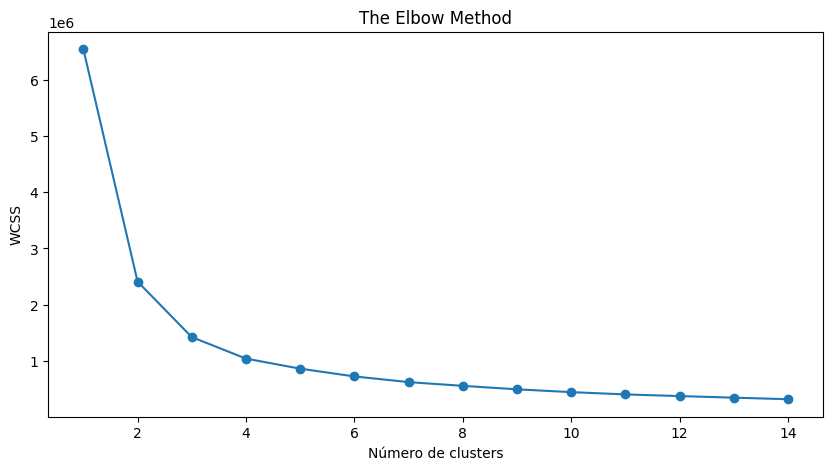

In [223]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


In [224]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [225]:
kmeans1 = kmeans.fit(df[['age', 'education']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [226]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[47.67734366, 10.51531151],
       [35.41116006, 10.44718551],
       [63.19771401,  9.69236381],
       [23.51034909, 10.20749665]])

In [227]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([2, 2, 2, ..., 1, 2, 3], dtype=int32)

In [228]:
grafico = px.scatter(x = df['age'], y = df['education'], color=classificacao)
grafico.show()

In [229]:
import plotly.graph_objs as go

In [230]:
#SepalLengthCm x PetalLengthCm
graf1 = px.scatter(x = df['age'], y = df['education'], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [10, 10, 10, 10])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'SepalLengthCm')
graf3.update_yaxes(title = 'PetalLengthCm')
graf3.show()